**Violence classficatio using YOLO5**

 **IMPORT REQUIRED LIBRARIES**

In [ ]:
# 📚 Import all necessary Python libraries

# File and path handling
import os
from pathlib import Path

# Numerical and image processing
import numpy as np
from PIL import Image
import cv2

# Deep learning & model building
import torch
from torchvision import transforms
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Evaluation metrics and visualization
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm

# Google Colab specific
from google.colab import drive
from google.colab.patches import cv2_imshow

# 🔗 Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


### Our Data






Our dataset consists of approximately 22,000 images, split into two main classes: 'Violence' and 'NonViolence'


70% for trainin

15% for validation

15% for testing

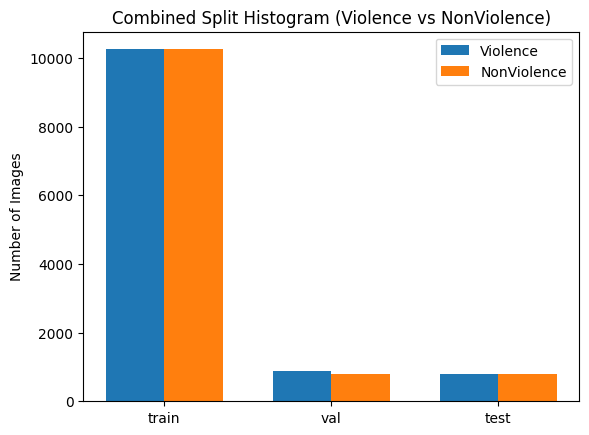

In [ ]:
# prompt:  histogram for the combined_split for all non and violent

import matplotlib.pyplot as plt
import os

# Assuming your combined_split directory structure is as described in the previous code
combined_path = "/content/drive/MyDrive/combined_split"
splits = ['train', 'val', 'test']
classes = ['Violence', 'NonViolence']

# Create lists to store the counts of each class
violence_counts = []
nonviolence_counts = []

for split in splits:
  violence_count = 0
  nonviolence_count = 0

  for cls in classes:
    class_path = os.path.join(combined_path, split, cls)
    if os.path.exists(class_path):
      count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

      if cls == 'Violence':
        violence_count = count
      elif cls == 'NonViolence':
        nonviolence_count = count

  violence_counts.append(violence_count)
  nonviolence_counts.append(nonviolence_count)


# Plotting
labels = ['train', 'val', 'test']
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(labels, violence_counts, width, label='Violence')
rects2 = ax.bar([i + width for i in range(len(labels))], nonviolence_counts, width, label='NonViolence')

ax.set_ylabel('Number of Images')
ax.set_title('Combined Split Histogram (Violence vs NonViolence)')
ax.set_xticks([i + width / 2 for i in range(len(labels))])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [ ]:
import os

base = "/content/drive/MyDrive/combined_split"
for split in ['train', 'test', 'val']:
    for cls in ['Violence', 'NonViolence']:
        path = os.path.join(base, split, cls)
        print(f"{path}: {len(os.listdir(path))} files")

/content/drive/MyDrive/combined_split/train/Violence: 10254 files
/content/drive/MyDrive/combined_split/train/NonViolence: 10254 files
/content/drive/MyDrive/combined_split/test/Violence: 785 files
/content/drive/MyDrive/combined_split/test/NonViolence: 785 files



*   Training: 10,254 images for both 'Violence' and 'NonViolence'
*   Testing: 785 images for both 'Violence' and 'NonViolence'


### **YOLOv6 CLASSIFICATION MODEL**

Copy the 'combined_split' folder from Google Drive to the root directory (/content/) in the Colab environment


In [ ]:
!cp -r /content/drive/MyDrive/combined_split /content/


Grab the YOLOv5 code from GitHub, move into the folder, and install everything needed to get it running in Colab


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17478, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 17478 (delta 80), reused 37 (delta 32), pack-reused 17358 (from 2)
Receiving objects: 100% (17478/17478), 16.31 MiB | 22.32 MiB/s, done.
Resolving deltas: 100% (11980/11980), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/

Train a YOLOv5n classifier for 10 epochs on 224x224 images using 32 batch size and 2 workers

In [ ]:
!python classify/train.py \
  --model yolov5n-cls.pt \
  --data /content/drive/MyDrive/combined_split\
  --img 224 \
  --epochs 10 \
  --batch 32 \
  --workers 2 \
  --name violence_yolov5n_cls

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-11 22:53:50.918995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747004030.941160   18224 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747004030.947974   18224 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

## EVALUATE YOLOv5 PERFORMANCE

Loads a pre-trained YOLOv5 classification model, evaluates it on validation data

In [ ]:
!python /content/yolov5/classify/val.py \
  --weights /content/yolov5/runs/train-cls/violence_yolov5n_cls/weights/best.pt \
  --data /content/drive/MyDrive/combined_split \
  --img 224


classify/val: data=/content/drive/MyDrive/combined_split, weights=['/content/yolov5/runs/train-cls/violence_yolov5n_cls/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 117 layers, 1211026 parameters, 0 gradients, 2.9 GFLOPs
testing:   0% 0/13 [00:00<?, ?it/s]/content/yolov5/classify/val.py:112: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type != "cpu"):
testing: 100% 13/13 [00:09<00:00,  1.36it/s]
                   Class      Images    top1_acc    top5_acc
                     all        1570        0.95           1
             NonViolence         785       0.906           1
                Violence         785       0.994           1
Speed

Model shows excellent performance on Violence class (99.4% accuracy), but slightly lower on NonViolence (90.6%).


## YOLO5 evaluation matrices

loading the training results of the YOLOv5 model from a CSV file

In [ ]:
import pandas as pd
results_df = pd.read_csv('/content/yolov5/runs/train-cls/violence_yolov5n_cls/results.csv')
print(results_df.head())
print(results_df.columns)

                   epoch             train/loss              test/loss  \
0                      0                0.28395                0.63583   
1                      1                0.23443                0.61176   
2                      2                0.22286                0.44016   
3                      3                0.21214                0.35738   
4                      4                0.20924                0.51319   

   metrics/accuracy_top1  metrics/accuracy_top5                   lr/0  
0                0.78153                      1               0.000901  
1                0.74140                      1               0.000802  
2                0.84268                      1               0.000703  
3                0.89427                      1               0.000604  
4                0.84968                      1               0.000505  
Index(['                  epoch', '             train/loss',
       '              test/loss', '  metrics/accuracy_to

 Over 5 epochs, training and test losses generally decreased, while top-1 accuracy improved — a sign of effective model training.


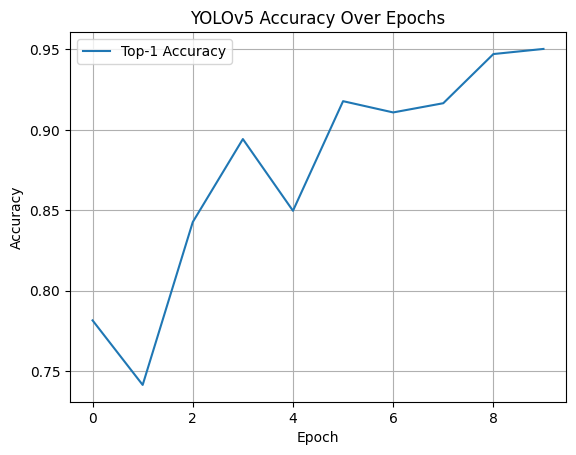

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/yolov5/runs/train-cls/violence_yolov5n_cls/results.csv')
df.columns = df.columns.str.strip()
if 'metrics/accuracy_top1' in df.columns:
    plt.plot(df['metrics/accuracy_top1'], label='Top-1 Accuracy')
    plt.title("YOLOv5 Accuracy Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("metrics/accuracy_top1 column not found.")


display a graph that shows YOLO5 accuracy over epochs

the graphs shows: The accuracy increases over epochs, showing the model's improving performance over time.


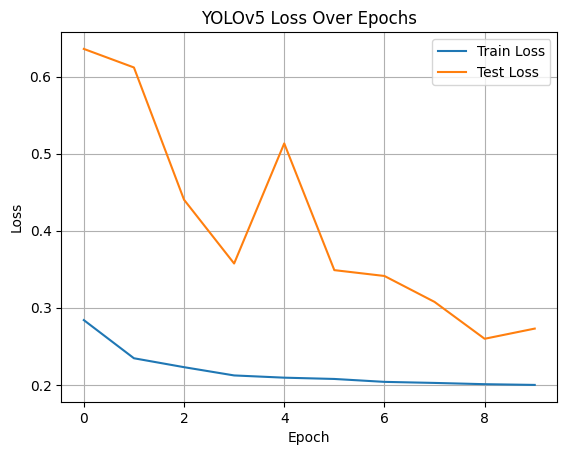

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/yolov5/runs/train-cls/violence_yolov5n_cls/results.csv')
df.columns = df.columns.str.strip()

if 'train/loss' in df.columns and 'test/loss' in df.columns:
    plt.plot(df['train/loss'], label='Train Loss')
    plt.plot(df['test/loss'], label='Test Loss')
    plt.title("YOLOv5 Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("Loss columns not found.")


display a graph that shows YOLO5 loss over epochs

the graphs shows: the model learning effectively

the spike at epoch 4 might indicate temprory overfitting but the test loss continues to decrease

## Displaying Classification Report

 imports necessary libraries for image processing

In [ ]:
import torch
from PIL import Image
from torchvision import transforms
import os
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


generating and printing a classification report


In [ ]:
# Classification report
report = classification_report(y_true, y_pred, target_names=['NonViolence', 'Violence'])
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

 NonViolence       0.96      0.93      0.95       784
    Violence       0.94      0.97      0.96       876

    accuracy                           0.95      1660
   macro avg       0.95      0.95      0.95      1660
weighted avg       0.95      0.95      0.95      1660



The model correctly classified 95% of the total images.
This indicates the model performs very well, especially with a strong recall for violence images.




Both training and test loss decrease as epochs increase, indicating the model is learning

